In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv("/content/Classified Data",index_col=0)

In [ ]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [ ]:
x = df.iloc[:,:-1]

In [ ]:
y = df['TARGET CLASS']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
train = scaler.fit_transform(x)

In [ ]:
train

array([[0.4779121 , 0.51759273, 0.25584607, ..., 0.23171931, 0.33821385,
        0.47176676],
       [0.29806768, 0.40386405, 0.23483597, ..., 0.48054997, 0.16862214,
        0.68009105],
       [0.3534701 , 0.54590434, 0.48399637, ..., 0.57539686, 0.38981083,
        0.51496952],
       ...,
       [0.62109238, 0.3885955 , 0.39372412, ..., 0.06064075, 0.36436871,
        0.59462402],
       [0.58840762, 0.30191296, 0.15223219, ..., 0.51271266, 0.59998625,
        0.43720711],
       [0.42850058, 0.37331294, 0.15857854, ..., 0.40949472, 0.58665816,
        0.57814674]])

<ipython-input-17-66df391e5e1d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train)


<Axes: ylabel='Density'>

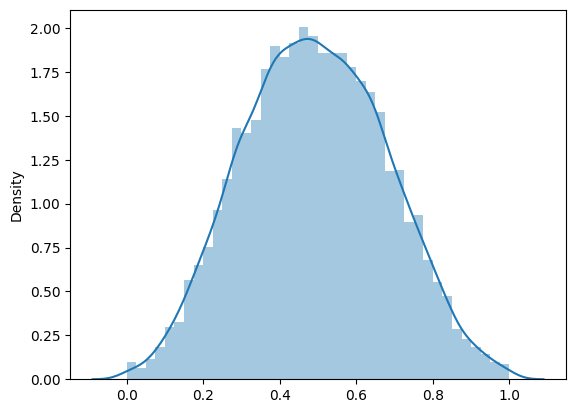

In [ ]:
sns.distplot(train)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train,y,test_size=0.30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[129  23]
 [ 13 135]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       152
           1       0.85      0.91      0.88       148

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



In [ ]:
knn.score(X_test,y_test)

0.88

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
error_rate

[0.12,
 0.11,
 0.1,
 0.09,
 0.08666666666666667,
 0.09,
 0.10333333333333333,
 0.08666666666666667,
 0.09,
 0.07666666666666666,
 0.09333333333333334,
 0.09333333333333334,
 0.09666666666666666,
 0.09333333333333334,
 0.09,
 0.08333333333333333,
 0.08666666666666667,
 0.08,
 0.08333333333333333,
 0.07666666666666666,
 0.08,
 0.08333333333333333,
 0.08666666666666667,
 0.07333333333333333,
 0.08,
 0.07333333333333333,
 0.08,
 0.08,
 0.08666666666666667,
 0.07,
 0.07666666666666666,
 0.08,
 0.08333333333333333,
 0.08333333333333333,
 0.08666666666666667,
 0.08333333333333333,
 0.09,
 0.09,
 0.09]

Text(0, 0.5, 'Error Rate')

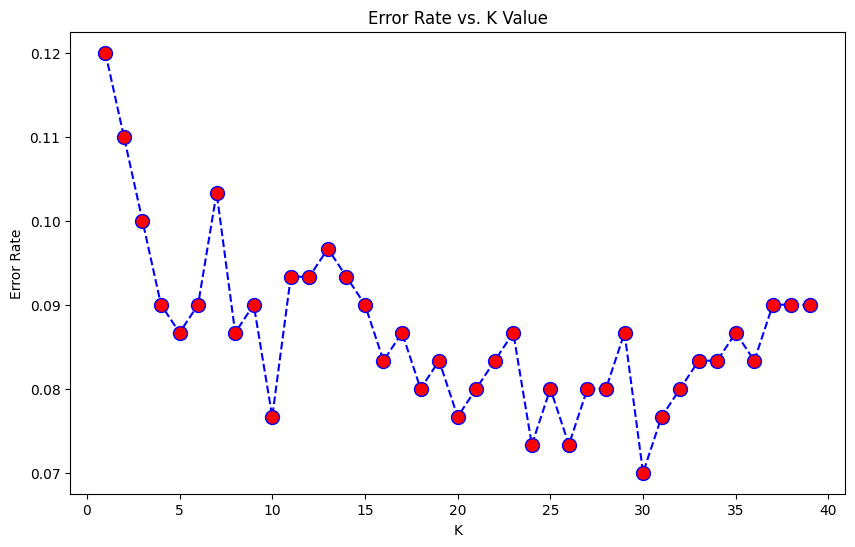

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=29)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[134  18]
 [  8 140]]


              precision    recall  f1-score   support

           0       0.94      0.88      0.91       152
           1       0.89      0.95      0.92       148

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5)

knn2.fit(X_train,y_train)
pred = knn2.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[137  15]
 [ 11 137]]


              precision    recall  f1-score   support

           0       0.93      0.90      0.91       152
           1       0.90      0.93      0.91       148

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [ ]:
knn2.score(X_test,y_test)

0.9133333333333333

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=3)

knn2.fit(X_train,y_train)
pred = knn2.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[132  20]
 [ 10 138]]


              precision    recall  f1-score   support

           0       0.93      0.87      0.90       152
           1       0.87      0.93      0.90       148

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.svm import SVC
svm=SVC()

In [ ]:
svm.fit(X_train,y_train)


SVC()

In [ ]:
svm.score(X_test,y_test)

0.92

In [ ]:
k = 5
skf = KFold(n_splits=k, shuffle=True, random_state=42)


scores = cross_val_score(knn, x, y, cv=skf, scoring='accuracy')

In [ ]:
print(f"Accuracy Scores for each fold: {scores}")
print(f"Mean Accuracy: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")

Accuracy Scores for each fold: [0.95  0.945 0.91  0.93  0.94 ]
Mean Accuracy: 0.94
Standard Deviation: 0.01


In [ ]:
k = 5
skf = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(svm, x, y, cv=skf, scoring='accuracy')

In [ ]:
print(f"Accuracy Scores for each fold: {scores}")
print(f"Mean Accuracy: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")

Accuracy Scores for each fold: [0.955 0.95  0.925 0.945 0.935]
Mean Accuracy: 0.94
Standard Deviation: 0.01
